# KNN Classifier

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
data = pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Drop Id Column
data = data.drop("Id", axis=1)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Features and target
X = data.drop("Species", axis=1)
y = data["Species"]

In [7]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train[:5], y_train[:5].tolist()

(array([[-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
        [-1.14301691, -1.28197243,  0.42156442,  0.65911782],
        [ 1.15917263, -0.58776353,  0.59216153,  0.26469891],
        [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ],
        [-0.41600969, -1.28197243,  0.1372359 ,  0.13322594]]),
 ['Iris-setosa',
  'Iris-virginica',
  'Iris-versicolor',
  'Iris-setosa',
  'Iris-versicolor'])

# Train KNN Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

results = {}

In [10]:
# Try different values of K
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[k] = acc

results

{1: 0.9666666666666667,
 2: 0.9333333333333333,
 3: 0.9333333333333333,
 4: 0.9333333333333333,
 5: 0.9333333333333333,
 6: 0.9333333333333333,
 7: 0.9666666666666667,
 8: 0.9333333333333333,
 9: 0.9666666666666667,
 10: 0.9666666666666667}

# Confusion Matrix

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Choose k=3 as a balance
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

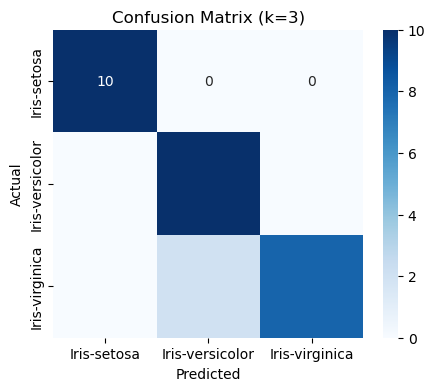

In [15]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (k=3)")
plt.show()

Conclusion:-
1. Most predictions are correct.
2. A few misclassifications between Versicolor and Virginica, which is expected since they are similar species.

# Visualisation Decision Boundaries

In [16]:
import numpy as np

In [17]:
# Use only first two features for visualization
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

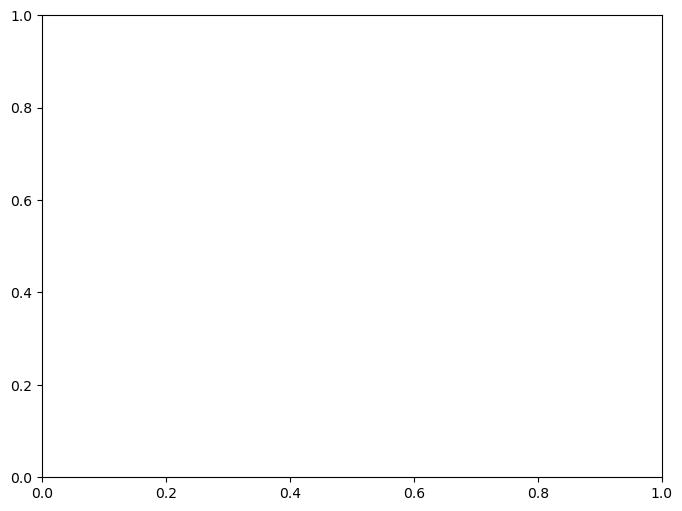

In [19]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis.astype('category').cat.codes, edgecolor='k', cmap=plt.cm.Set1, label="Train")
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis.astype('category').cat.codes, marker="x", cmap=plt.cm.Set1, label="Test")
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.title("Decision Boundaries (k=3)")
plt.legend()
plt.show()

In [20]:
# Map species names to numeric codes
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)   # convert full dataset labels
knn_vis.fit(X_train_vis, le.transform(y_train_vis))  # train with numeric labels

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

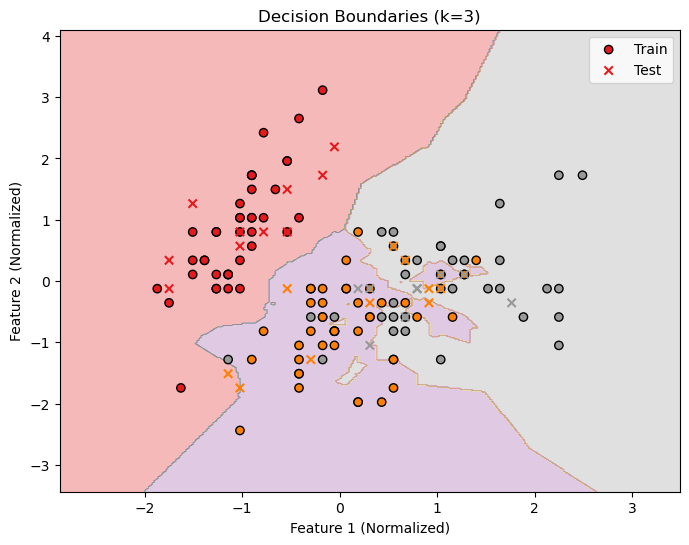

In [22]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# Plot training and test points
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1],
            c=le.transform(y_train_vis), edgecolor='k', cmap=plt.cm.Set1, label="Train")
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1],
            c=le.transform(y_test_vis), marker="x", cmap=plt.cm.Set1, label="Test")

plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.title("Decision Boundaries (k=3)")
plt.legend()
plt.show()


# 3D Decision Boundaries

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [24]:
# Take first 3 features
X_vis3 = X_scaled[:, :3]
X_train_vis3, X_test_vis3, y_train_vis3, y_test_vis3 = train_test_split(
    X_vis3, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
# Encode labels numerically
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_vis3)
y_test_enc = le.transform(y_test_vis3)

In [26]:
# Train KNN
knn_3d = KNeighborsClassifier(n_neighbors=3)
knn_3d.fit(X_train_vis3, y_train_enc)


KNeighborsClassifier(n_neighbors=3)

In [27]:
# Create meshgrid for 3D space
x_min, x_max = X_vis3[:, 0].min() - 1, X_vis3[:, 0].max() + 1
y_min, y_max = X_vis3[:, 1].min() - 1, X_vis3[:, 1].max() + 1
z_min, z_max = X_vis3[:, 2].min() - 1, X_vis3[:, 2].max() + 1

xx, yy, zz = np.meshgrid(
    np.linspace(x_min, x_max, 30),
    np.linspace(y_min, y_max, 30),
    np.linspace(z_min, z_max, 30)
)

In [28]:
# Predict labels for meshgrid
Z = knn_3d.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

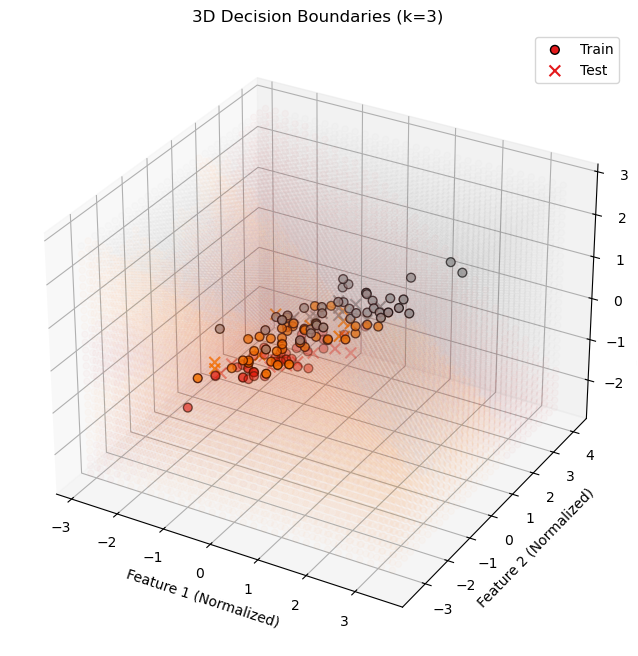

In [32]:
# 3D Plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot decision regions (as semi-transparent voxels)
ax.scatter(xx.ravel(), yy.ravel(), zz.ravel(), c=Z.ravel(), alpha=0.02, cmap=plt.cm.Set1)

# Plot actual training points
ax.scatter(X_train_vis3[:,0], X_train_vis3[:,1], X_train_vis3[:,2],
           c=y_train_enc, cmap=plt.cm.Set1, edgecolor='k', s=40, label="Train")

# Plot actual test points (as X markers)
ax.scatter(X_test_vis3[:,0], X_test_vis3[:,1], X_test_vis3[:,2],
           c=y_test_enc, cmap=plt.cm.Set1, marker='x', s=60, label="Test")

ax.set_xlabel("Feature 1 (Normalized)")
ax.set_ylabel("Feature 2 (Normalized)")
ax.set_zlabel("Feature 3 (Normalized)")
ax.set_title("3D Decision Boundaries (k=3)")
ax.legend()
plt.show()